In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

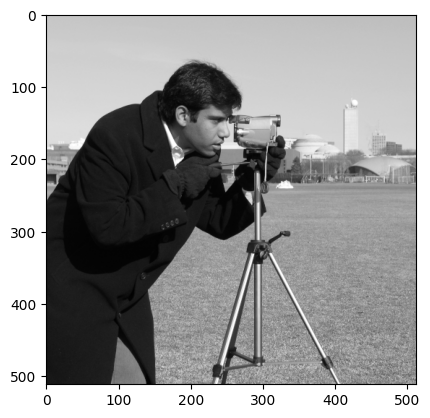

In [5]:
image = data.camera()
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
plt.imshow(image)

1). To reduce the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


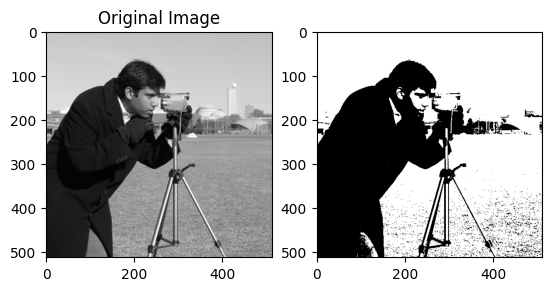

In [14]:
f, arr = plt.subplots(1,2)
image = data.camera()
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
arr[0].imshow(image)
arr[0].set_title('Original Image')

def cd(image,levels):
    if levels < 1 or levels > 8:
        raise ValueError("Levels must be between 1 and 8")
    steps = pow(2,levels)-1
    step = 255/steps
    image_new = np.round(image/step)*step
    arr[1].imshow(image_new)

cd(image,1)

Image shape: (512, 512)
Image dataType: <class 'numpy.ndarray'>


Text(0.5, 1.0, '2^7')

<Figure size 640x480 with 0 Axes>

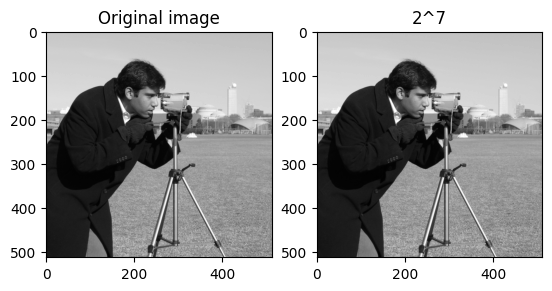

In [41]:
def reduce_intensity_levels(image, levels):
    print("Image shape:", image.shape )
    print("Image dataType:", type(image))
    steps = pow(2,levels)-1
    step = 255/ steps
 
    reduced_image = np.round(image/step)*step
    
    return reduced_image

image = data.camera()
levels = int(input("Enter the desired number of intensity levels as a integer power of 2: "))
plt.gray()
f,arr = plt.subplots(1,2)
reduced = reduce_intensity_levels(image, levels) 
arr[0].imshow(image)
arr[0].set_title('Original image')
arr[1].imshow(reduced)
arr[1].set_title('2^{}'.format(levels))

2). Load an image and then perform a simple spatial 3x3 average of image pixels. Repeat the process for a 10x10 neighborhood and again for a 20x20 neighborhood.

Text(0.5, 1.0, '20x20')

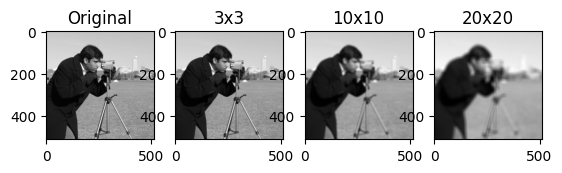

In [38]:
f, arr = plt.subplots(1, 4)
arr[0].imshow(image)
arr[0].set_title('Original')

arr[1].imshow(cv2.blur(image,(3,3)))
arr[1].set_title('3x3')

arr[2].imshow(cv2.blur(image,(10,10)))
arr[2].set_title('10x10')

arr[3].imshow(cv2.blur(image,(20,20)))
arr[3].set_title('20x20')

3). Rotate an image by 45 and 90 degrees.

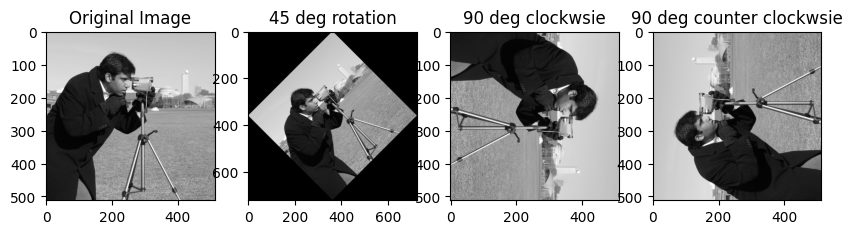

In [36]:
import scipy.misc
from scipy import ndimage
img = data.camera()
f,arr = plt.subplots(1,4,figsize=(10,10))
arr[0].imshow(image)
arr[0].set_title('Original Image')

rotated_img_45 = ndimage.rotate(img, 45)
arr[1].imshow(rotated_img_45, cmap=plt.cm.gray)
arr[1].set_title('45 deg rotation')

img_cw_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
arr[2].imshow(img_cw_90, cmap=plt.cm.gray)
arr[2].set_title('90 deg clockwsie')

img_ccw_90 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
arr[3].imshow(img_ccw_90, cmap=plt.cm.gray)
arr[3].set_title('90 deg counter clockwsie')

plt.show()

4). For every 3×3 block of the image (without overlapping), replace all corresponding 9 pixels by their average. This operation simulates reducing the image spatial resolution. Repeat this for 5×5 blocks and 7×7 blocks.

<Figure size 640x480 with 0 Axes>

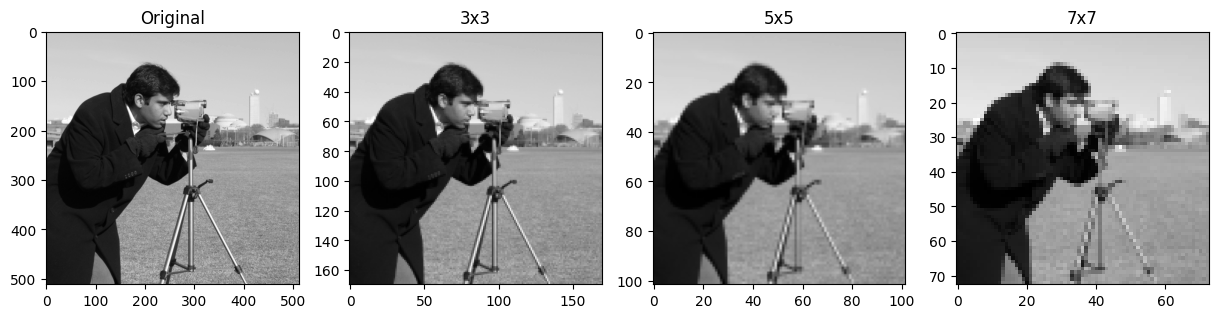

In [54]:
def replace_block_image(img, factor):
    
    replaced_img = np.zeros((img.shape[0]//factor, img.shape[1]//factor), dtype=np.uint8)
    block_size = (factor,factor)

    for y in range(0, img.shape[0]-block_size[0]+1, block_size[0]):
        for x in range(0, img.shape[1]-block_size[1]+1, block_size[1]):
            block = img[y:y+block_size[0], x:x+block_size[1]]
        
            avg = block.mean(axis=(0, 1))
            replaced_img[y//factor][x//factor] = avg

    return replaced_img


image = data.camera()
factorInput =input("Enter the factor separated by comma: ")
factors =factorInput.split(',')

plt.gray()
f,arr = plt.subplots(1,len(factors)+1, figsize=(15, 15))
arr[0].imshow(image)
arr[0].set_title("Original")

for i,x in enumerate(factors):
    factor = int(x)
    reduceisr_image = replace_block_image(image, factor)
    arr[i+1].imshow(reduceisr_image)
    arr[i+1].set_title(f"{factor}x{factor}")
